In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
# Import API key
import api_keys
#from config import api_key

In [6]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [7]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

## Perform API Calls

In [16]:
# OpenWeatherMap API Key
api_key = api_keys.api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
temps = []
humid = []
cloudiness = []
wind_speed = []
lats = []

#create query url
for city in cities:
    data = requests.get(url).json()
    query = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response = requests.get(query).json()
    
    try:
        temp = response['main']['temp_max']
        temps.append(temp)
        hum = response['main']['humidity']
        humid.append(hum)
        cloud = response['clouds']['all']
        cloudiness.append(cloud)
        wind = response['wind']['speed']
        wind_speed.append(wind)
        lat = response['coord']['lat']
        lats.append(lat)
        
    except KeyError:
        print(city, wind)
        


tsihombe 6.93
barentsburg 6.93
dianopolis 12.01
attawapiskat 2.24
illoqqortoormiut 3.36
belushya guba 3.36
bengkalis 11.34
burica 8.95
taolanaro 11.18
kamenskoye 4.7
meyungs 1.05
ust-kamchatsk 3.4
sentyabrskiy 1.05
puunsi 4.47
ndele 3.4
sorvag 2.24
louisbourg 6.93
nizhneyansk 9.17
kesennuma 10
bengkulu 10.29
saalfelden 2.28
warqla 3.18
marcona 10.67
rungata 2.73
do rud 2.62
ngukurr 3.62
acarau 11.79
lolua 9.44
andevoranto 3.4
nguiu 3.4
aghiresu 2.73
jiddah 2.17
zolotinka 9.1
samusu 5.82
maarianhamina 11.41
bac lieu 8.05
mys shmidta 12.75
krasnoselkup 10.29
grand river south east 8.05
bokspits 13.24
disna 9.17
scalloway 4.7
sulurpeta 1.12
bolungarvik 6.71
asayita 7.2
alotau 1.12
zachagansk 1.12
play cu 2.24
samalaeulu 11.41
azimur 4.7
tidore 3.74
halalo 19.46
cockburn harbour 2.06


In [18]:
#create dataframe
weather_df = pd.DataFrame({
    "Temperature": temps,
    "Humidity": humid,
    "Clouds": cloudiness,
    "Wind": wind_speed,
    "Latitude": lats,
})
weather_df.head()

,Clouds,Humidity,Latitude,Temperature,Wind
0,40,83,6.43,75.20,11.41
1,76,100,-0.74,69.72,12.01
2,20,68,59.64,68.00,8.05
3,0,83,-46.43,42.36,9.22
4,68,85,-34.42,49.56,8.77


In [46]:
import datetime
date = datetime.datetime.now()
print(dir(datetime))
current_date = ("(" + str(date.month) + "/" + str(date.day) + "/" + str(date.year) + ")")
current_date


['MAXYEAR', 'MINYEAR', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_divide_and_round', 'date', 'datetime', 'datetime_CAPI', 'time', 'timedelta', 'timezone', 'tzinfo']


'(8/6/2018)'

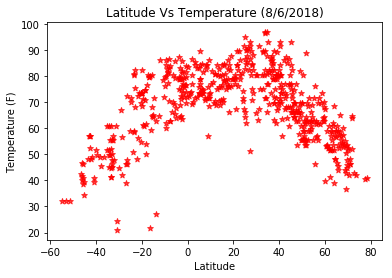

In [53]:
#scatter plot Latitude vs Max Temp
import datetime
plt.scatter(lats, temps, marker="*", facecolors="red", alpha=0.75)
x_lim = 100
plt.title("Latitude Vs Temperature" + " " + current_date)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("Temperature_Vs_Latitude.png")
plt.show()

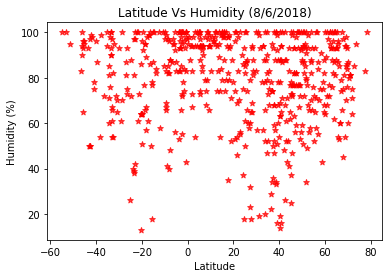

In [54]:
#scatter plot of Humidity vs latitude
plt.scatter(lats, humid, marker="*", facecolors="red", alpha=0.75)

plt.title("Latitude Vs Humidity" + " " + current_date)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Humidity_Vs_Latitude.png")
plt.show()

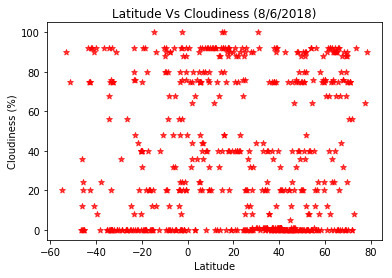

In [55]:
#scatter plot of Latitude Vs Cloudiness
plt.scatter(lats, cloudiness, marker="*", facecolors="red", alpha=0.75)

plt.title("Latitude Vs Cloudiness" + " " + current_date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Cloudiness_Vs_Latitude.png")
plt.show()

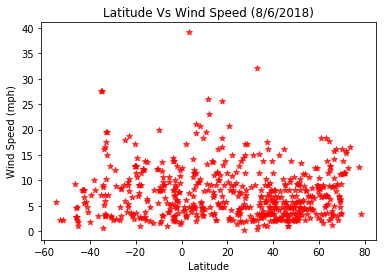

In [56]:
# scatter plot of latitude vs wind speed
plt.scatter(lats, wind_speed, marker="*", facecolors="red", alpha=0.75)

plt.title("Latitude Vs Wind Speed" + " " + current_date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Wind_speed_Vs_Latitude.png")
plt.show()

Observations
- The graph shows an increase in temperature with proximity to the equator.
- I could not find and relationship between the city Latitude and the Humidity, Cloudiness and Wind speed.